In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Import Data**

In [ ]:
df=pd.read_csv('drive/My Drive/CoelCodingChallenge/activity.csv')

In [ ]:
df.head()

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1
1,2021-05-11,0032j00000FZcIvAAL,a,1
2,2020-12-09,0032j000002gKM8AAM,a,1
3,2021-03-30,0032j000001UX7cAAG,a,1
4,2020-10-19,0032j000004etUWAAY,a,1


**Date column was string so we want to convert date and type will (Year, Month & day)**

In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
df['date']=df['date'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904772 entries, 0 to 904771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            904772 non-null  object
 1   customer        904772 non-null  object
 2   activity_type   904772 non-null  object
 3   activity_count  904772 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 27.6+ MB


In [ ]:
df['date']=pd.to_datetime(df['date'])

**Find the last date**

In [ ]:
df['date'].max()

Timestamp('2021-05-23 00:00:00')

In [ ]:
now=dt.datetime(2021,5,24)

In [ ]:
df['customer'].nunique()

139556

**Group by customer for how many time visiting customers, type of product active and total active count**

In [ ]:
data=df.groupby('customer').agg({'date':lambda x:(now-x.max()).days, 'activity_type':lambda x:len(x), 'activity_count':lambda x: x.sum()})

In [ ]:
data.head()

,date,activity_type,activity_count
customer,,,
0030o00002nkSmtAAE,181,1,1
0030o00002nkSmuAAE,151,3,3
0030o00002nkSnHAAU,108,11,11
0030o00002nkSnIAAU,46,4,4
0030o00002nkSnfAAE,180,27,27


In [ ]:
data=data.reset_index()

In [ ]:
data.head()

,customer,date,activity_type,activity_count
0,0030o00002nkSmtAAE,181,1,1
1,0030o00002nkSmuAAE,151,3,3
2,0030o00002nkSnHAAU,108,11,11
3,0030o00002nkSnIAAU,46,4,4
4,0030o00002nkSnfAAE,180,27,27


**columns convert recency, frequency & monetary_value**




In [ ]:
data.columns=['Customer','recency','frequency','monetary_value']

In [ ]:
data.head()

,Customer,recency,frequency,monetary_value
0,0030o00002nkSmtAAE,181,1,1
1,0030o00002nkSmuAAE,151,3,3
2,0030o00002nkSnHAAU,108,11,11
3,0030o00002nkSnIAAU,46,4,4
4,0030o00002nkSnfAAE,180,27,27


**Normalize data 1 to 50**

In [ ]:
data['recency_normalizes']=pd.qcut(data['recency'],50, labels=False, duplicates='drop')
data['recency_normalizes']=data['recency_normalizes']+1
data['frequency_normalized']=pd.qcut(data['frequency'],50, labels=False, duplicates='drop')
data['frequency_normalized']=data['frequency_normalized']+1
data['monetary_value_normalized']=pd.qcut(data['monetary_value'],50, labels=False, duplicates='drop')
data['monetary_value_normalized']=data['monetary_value_normalized']+1

In [ ]:
data.head()

,Customer,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized
0,0030o00002nkSmtAAE,181,1,1,40,1,1
1,0030o00002nkSmuAAE,151,3,3,36,2,2
2,0030o00002nkSnHAAU,108,11,11,29,10,10
3,0030o00002nkSnIAAU,46,4,4,8,3,3
4,0030o00002nkSnfAAE,180,27,27,39,14,14


In [ ]:
import numpy as np
from sklearn import preprocessing

data_ARRAY = np.array(data.iloc[:,4:8])          # Getting only the numeric features from the dataset
data_NORM  = preprocessing.normalize(data_ARRAY)

In [ ]:
data_ARRAY

array([[40,  1,  1],
       [36,  2,  2],
       [29, 10, 10],
       ...,
       [ 1,  1,  1],
       [ 1, 10, 10],
       [ 1,  1,  1]])

In [ ]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 10)

# Training our model
kmeans.fit(data_NORM)

KMeans(n_clusters=10)

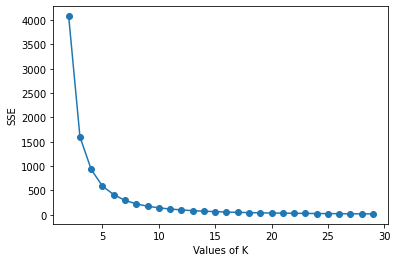

In [ ]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 30)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(data_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 7)

# Training our model
kmeans.fit(data_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
data['cluster'] = kmeans.labels_

In [ ]:
data

,Customer,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized,cluster
0,0030o00002nkSmtAAE,181,1,1,40,1,1,0
1,0030o00002nkSmuAAE,151,3,3,36,2,2,0
2,0030o00002nkSnHAAU,108,11,11,29,10,10,3
3,0030o00002nkSnIAAU,46,4,4,8,3,3,6
4,0030o00002nkSnfAAE,180,27,27,39,14,14,3
...,...,...,...,...,...,...,...,...
139551,0032j00000GjNaoAAF,2,16,16,1,12,12,4
139552,0032j00000GjNatAAF,2,1,1,1,1,1,1
139553,0032j00000GjOJ1AAN,2,1,1,1,1,1,1
139554,0032j00000GjPtaAAF,2,11,11,1,10,10,4


In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data[data.cluster == C]['recency_normalizes'],
                                y = data[data.cluster == C]['frequency_normalized'],
                                z = data[data.cluster == C]['monetary_value_normalized'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'data Segment ' + str(C)))

In [ ]:
PLOT.update_layout(width = 1000, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

**Cluster group by for recency**

In [ ]:
cluster_energy=data.groupby(by='cluster').sum('recency')

In [ ]:
cluster_energy

,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized
cluster,,,,,,
0,11768865,108802,108802,2631158,84009,84009
1,319998,97920,97920,67796,57014,57014
2,223433,144782,144782,45288,76141,76141
3,911087,72895,72895,210022,57324,57324
4,63629,293644,293644,18000,93351,93351
5,1823359,67430,67430,417557,51086,51086
6,617617,119299,119299,144145,68648,68648


**Find cluster strength**

In [ ]:
cluster_energy['strength']=cluster_energy['frequency_normalized']+cluster_energy['monetary_value_normalized']-cluster_energy['recency_normalizes']

In [ ]:
cluster_energy

,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized,strength
cluster,,,,,,,
0,11768865,108802,108802,2631158,84009,84009,-2463140
1,319998,97920,97920,67796,57014,57014,46232
2,223433,144782,144782,45288,76141,76141,106994
3,911087,72895,72895,210022,57324,57324,-95374
4,63629,293644,293644,18000,93351,93351,168702
5,1823359,67430,67430,417557,51086,51086,-315385
6,617617,119299,119299,144145,68648,68648,-6849


In [ ]:
cluster_energy.reset_index(inplace=True)

In [ ]:
cluster_energy.head(7)

,cluster,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized,strength
0,0,11768865,108802,108802,2631158,84009,84009,-2463140
1,1,319998,97920,97920,67796,57014,57014,46232
2,2,223433,144782,144782,45288,76141,76141,106994
3,3,911087,72895,72895,210022,57324,57324,-95374
4,4,63629,293644,293644,18000,93351,93351,168702
5,5,1823359,67430,67430,417557,51086,51086,-315385
6,6,617617,119299,119299,144145,68648,68648,-6849


**Ascending the strength value**

In [ ]:
cluster_energy.sort_values('strength',ascending=False,inplace=True)

In [ ]:
cluster_energy

,cluster,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized,strength
4,4,63629,293644,293644,18000,93351,93351,168702
2,2,223433,144782,144782,45288,76141,76141,106994
1,1,319998,97920,97920,67796,57014,57014,46232
6,6,617617,119299,119299,144145,68648,68648,-6849
3,3,911087,72895,72895,210022,57324,57324,-95374
5,5,1823359,67430,67430,417557,51086,51086,-315385
0,0,11768865,108802,108802,2631158,84009,84009,-2463140


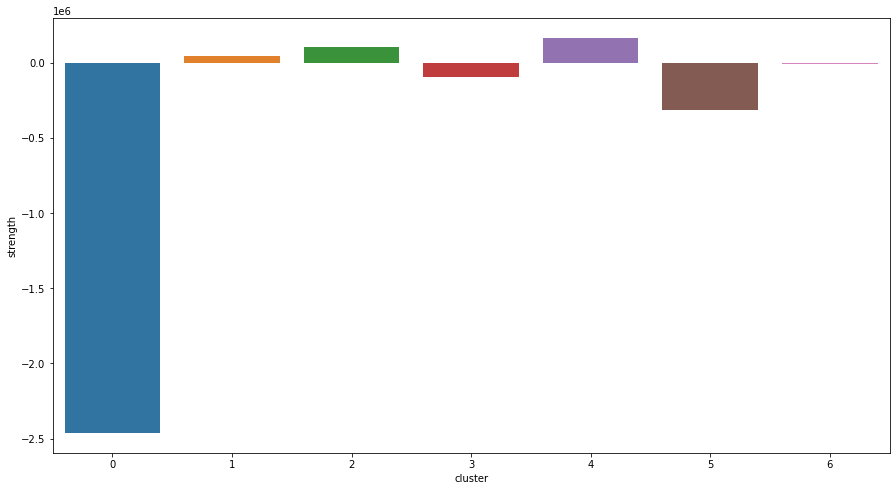

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='cluster', y='strength', data=cluster_energy)


In [ ]:
data[data.cluster==0]

,Customer,recency,frequency,monetary_value,recency_normalizes,frequency_normalized,monetary_value_normalized,cluster
0,0030o00002nkSmtAAE,181,1,1,40,1,1,0
1,0030o00002nkSmuAAE,151,3,3,36,2,2,0
5,0030o00002nkSngAAE,231,1,1,48,1,1,0
6,0030o00002nkSnjAAE,63,2,2,13,1,1,0
7,0030o00002nkSnkAAE,166,1,1,38,1,1,0
...,...,...,...,...,...,...,...,...
139350,0032j00000GiU1GAAV,94,2,2,24,1,1,0
139390,0032j00000GiUgVAAV,172,4,4,39,3,3,0
139394,0032j00000GiUioAAF,173,3,3,39,2,2,0
139395,0032j00000GiUjMAAV,112,1,1,30,1,1,0


**So we finaly see the cluster 0 customer so inactive. So we will close deal for cluster 0 customer.**